Baseline Model: TF-IDF + Logistic Regression
- Input: combined job title and resume text
- Vectorization: TF-IDF with 1–2 grams, 5000 features
- Classifier: Logistic Regression
- Data split: 80/20 stratified by seniority

Evaluation Results:
- Accuracy: 81.2%
- F1-score per class:
  • Junior: 0.8
  • Mid: 0.81
  • Senior: 0.82

Confusion Matrix (rows = true, columns = predicted):
[[36  0  9]
 [ 4 17  3]
 [ 5  1 42]]


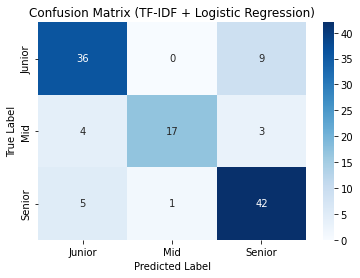

In [1]:
# Step 0: Upload + Prepare
# from google.colab import files
import io
import pandas as pd

#uploaded = files.upload()
#first_file = next(iter(uploaded))
df = pd.read_excel("research_data.xlsx")

# Clean and normalize
df = df.dropna(subset=['Resume', 'Seniority', 'Job Title'])
df['Seniority'] = df['Seniority'].str.strip().str.lower()
df['combined_text'] = df['Job Title'].astype(str) + ' ' + df['Resume'].astype(str)

# Step 1: Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['combined_text'], df['Seniority'], test_size=0.2, random_state=42, stratify=df['Seniority']
)

# Step 2: TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 3: Model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)

# Step 4: Evaluation
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred, labels=['junior', 'mid', 'senior'])

# Step 5: Summary for Slide
baseline_summary = []
baseline_summary.append("Baseline Model: TF-IDF + Logistic Regression")
baseline_summary.append("- Input: combined job title and resume text")
baseline_summary.append("- Vectorization: TF-IDF with 1–2 grams, 5000 features")
baseline_summary.append("- Classifier: Logistic Regression")
baseline_summary.append("- Data split: 80/20 stratified by seniority")
baseline_summary.append("")
baseline_summary.append("Evaluation Results:")
baseline_summary.append(f"- Accuracy: {round(report['accuracy'] * 100, 2)}%")
baseline_summary.append("- F1-score per class:")
for label in ['junior', 'mid', 'senior']:
    f1 = report[label]['f1-score']
    baseline_summary.append(f"  • {label.title()}: {round(f1, 2)}")
baseline_summary.append("")
baseline_summary.append("Confusion Matrix (rows = true, columns = predicted):")
baseline_summary.append(str(conf_matrix))

# Print summary for your slide
print("\n".join(baseline_summary))

# Step 6: Confusion Matrix Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Junior', 'Mid', 'Senior'],
            yticklabels=['Junior', 'Mid', 'Senior'])
plt.title("Confusion Matrix (TF-IDF + Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()